In [1540]:
#Import packages to be used
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1541]:
import warnings
warnings.filterwarnings('ignore')

In [1542]:
df = pd.read_csv("listings.csv")
pd.set_option("max_rows",1000)
pd.set_option('max_columns',1000)

In [1543]:
#drop the column we don't sure don't want to use
del df["thumbnail_url"]
del df["medium_url"]
del df["picture_url"]
del df["xl_picture_url"]
del df["host_id"]
del df["host_name"]
del df['jurisdiction_names']
del df['neighbourhood_group_cleansed']

## Choosing our variables

* First, let's toss out some variables. Our reasons why we chose those variables included too many NaN in that column(and we think it's also hard to replace it with other made-up value) or based on our domain knowledge, our group  thinks it will has tiny effects on our final predictions. 

In [1544]:
#choosing variables
df2 = df.iloc[:,[19,20,22,26,27,28,29,30,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,69,70,71,72,73,75,76,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,95,96,97]]

## Cleaning the data!
* We try imputing the more meaningful data instead of dropping missing variable or imputing 0. We impute mean, median or mode to respective columns. We try to make the data more close the normal distribution when it contain missing values and we think imputing the mean, median, or mode is  the most appropriate way.

In [1545]:
# clean weekly_price
#get rid of anything that stop the string from converting to numeric data 
# impute mean
df.iloc[:,[61]]
df2.weekly_price = df2['weekly_price'].str.replace("$","")
df2.weekly_price = df2.weekly_price.str.split(".").str[0]
df2.weekly_price = df2.weekly_price.str.replace(",",'')
df2.weekly_price = df2.weekly_price.fillna(0).astype(float)
mean_wkp = np.mean(df2.weekly_price.where(df2.weekly_price > 0))
df2.weekly_price = df2.weekly_price.map(lambda x : mean_wkp if x == 0 else x)
df2.weekly_price.head()

0    843.570485
1    843.570485
2    600.000000
3    430.000000
4    843.570485
Name: weekly_price, dtype: float64

In [1546]:
# clean monthly_price
#get rid of anything that stop the string from converting to numeric data 
# impute median
df.iloc[:,[62]]
df2.monthly_price = df2.monthly_price.str.replace("$",'')
df2.monthly_price = df2.monthly_price.str.split(".").str[0]
df2.monthly_price = df2.monthly_price.str.replace(",",'')
df2.monthly_price = df2.monthly_price.fillna(0).astype(int)
median_mp = st.median(df2.monthly_price[df2.monthly_price != 0])
df2.monthly_price  = df2.monthly_price.map(lambda x : median_mp if x == 0 else x)

In [1547]:
#clean security_deposit
#get rid of anything that stop the string from converting to numberic data
#impute the mean
df.iloc[:,[63]]
df2.security_deposit = df2.security_deposit.str.split(".").str[0]
df2.security_deposit = df2.security_deposit.str.replace(",",'')
df2.security_deposit = df2.security_deposit .str.replace("$",'')
df2.security_deposit = df2.security_deposit.fillna(0).astype(float)
mean_secDep = np.mean(df2.security_deposit.where(df2.security_deposit >0))
df2.security_deposit  = df2.security_deposit.map(lambda x : mean_secDep if x == 0 else x)

In [1548]:
#clean security_deposit
#get rid of anything that stop the string from converting to numeric data 
#input the median
df2.cleaning_fee = df2.cleaning_fee.str.split(".").str[0]
df2.cleaning_fee = df2.cleaning_fee.str.replace(",",'')
df2.cleaning_fee = df2.cleaning_fee.str.replace("$",'')
df2.cleaning_fee = df2.cleaning_fee.fillna(0).astype(float)
median_cf = st.median(df2.cleaning_fee[df.cleaning_fee != 0])
df2.cleaning_fee = df2.cleaning_fee.map(lambda x : mean_secDep if x == 0 else x)

In [1549]:
#clean all the score rating columns
#input the mean
df2["review_scores_rating"] = df2["review_scores_rating"].fillna(st.median(df2["review_scores_rating"]))
df2["review_scores_checkin"] = df2["review_scores_checkin"].fillna(st.median(df2["review_scores_checkin"]))
df2["review_scores_cleanliness"] = df2["review_scores_cleanliness"].fillna(st.median(df2["review_scores_cleanliness"]))
df2["review_scores_communication"] = df2["review_scores_communication"].fillna(st.median(df2["review_scores_communication"]))
df2["review_scores_location"] = df2["review_scores_location"].fillna(st.median(df2["review_scores_location"]))
df2["review_scores_value"] = df2["review_scores_value"].fillna(st.median(df2["review_scores_value"]))
df2["review_scores_accuracy"] = df2["review_scores_accuracy"].fillna(st.median(df2["review_scores_accuracy"]))

In [1550]:
#clean respond rate and respond time 
#put in mode 
df2['host_response_rate'] = df2['host_response_rate'].fillna(st.mode(df2["host_response_rate"]))
df2['host_response_time'] = df2['host_response_time'].fillna(st.mode(df2["host_response_time"]))

In [1551]:
#clean review per month 
#imputing zero 
df2["reviews_per_month"] =df2["reviews_per_month"].fillna(0)

In [1552]:
#clean host_reponse rate 
df2.host_response_rate = df2.host_response_rate.str.replace("%","")

In [1553]:
#clean price 
#get rid of '$'
df2.price = df2.price.str.replace("$",'')
df2.price = df2.price.str.replace(",",'')

In [1554]:
df2.extra_people = df2.extra_people.str.replace('$','')
df2.extra_people = df2.extra_people.str.replace(",",'')

In [1555]:
#make t and f to 0 and 1
df2.host_identity_verified = df2.host_identity_verified.map(lambda x : 1 if x == 't' else 0)
df2.host_is_superhost = df2.host_is_superhost.map(lambda x : 1 if x == 't' else 0)
df2.is_location_exact = df2.is_location_exact.map(lambda x : 1 if x == 't' else 0)
df2.has_availability = df2.has_availability.map(lambda x : 1 if x == 't' else 0)
df2.requires_license = df2.requires_license.map(lambda x : 1 if x == 't' else 0)
df2.instant_bookable= df2.instant_bookable.map(lambda x : 1 if x == 't' else 0)
df2.require_guest_profile_picture= df2.require_guest_profile_picture.map(lambda x : 1 if x == 't' else 0)
df2.require_guest_phone_verification= df2.require_guest_phone_verification.map(lambda x : 1 if x == 't' else 0)
df2.is_business_travel_ready = df2.is_business_travel_ready.map(lambda x : 1 if x == 't' else 0)
df2.host_has_profile_pic = df2.host_has_profile_pic.map(lambda x : 1 if x == "t" else 0)

In [1556]:
#clean cancellation 
candict = df2.cancellation_policy.value_counts().to_dict()
candict["moderate"] =1
candict["flexible"] =2
candict["strict_14_with_grace_period"] = 3
candict['strict']=4
candict['super_strict_30']=5 
candict['super_strict_60']=6

In [1557]:
df2.cancellation_policy= df2.cancellation_policy.map(candict)

In [1558]:
#clean host_response_time 
hrdict = df2.host_response_time.value_counts().to_dict()
hrdict["with a hour"] = 1
hrdict["within a few hours"]=2 
hrdict["within an hour"] =3 
hrdict["within a day"] = 4
hrdict["a few days or more"] = 5
df2.host_response_time = df2.host_response_time.map(hrdict)

In [1559]:
# make categorical data into dummies variables
df2 = pd.get_dummies(df2, columns = ["property_type",'room_type','bed_type',])

In [1560]:
#split the context in host verification into dummies variables
df2['email'] = df2['host_verifications'].str.contains('[email]', regex=True).astype(int)
df2['phone'] = df2['host_verifications'].str.contains('[phone]', regex=True).astype(int)
df2['offline_government_id'] = df2['host_verifications'].str.contains('[offline_government_id]', regex=True).astype(int)

In [1561]:
#slit the context in amities into dummies variables
df2['Cable_TV'] = df2['amenities'].str.contains('[Cable TV]', regex=True).astype(int)
df2['Internet_wifi'] = df2['amenities'].str.contains('[Internet Wifi]', regex=True).astype(int)
df2['Air_conditioning'] = df2['amenities'].str.contains('[Air conditioning]', regex=True).astype(int)
df2['Cable_TV'] = df2['amenities'].str.contains('[Cable TV]', regex=True).astype(int)
df2['Free_street_parking'] = df2['amenities'].str.contains('[Free street parking]', regex=True).astype(int)
df2['kitchen'] = df2['amenities'].str.contains('[Kitchen]', regex=True).astype(int)
df2['Heating'] = df2['amenities'].str.contains('[Heating]', regex=True).astype(int)
df2['Smoking'] = df2['amenities'].str.contains('[Smoking]', regex=True).astype(int)

In [1562]:
# drop those host_verification  and amentiies 
del df2["host_verifications"]
del df2["amenities"]

In [1563]:
# last check drop any NAs
df2 =df2.dropna()

## Normalize !!
* We difinetly want our values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. 

In [1564]:
#pick out numeric data to normalize
df_numeric = df2.iloc[:,[3,4,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,35,36,37,38,39,40,47,48,49,50,51]]
#save the columns for later use 
saved_cols  = df_numeric.columns
df_numeric_nor = preprocessing.normalize(df_numeric)
df_numeric_nor = pd.DataFrame(df_numeric_nor, columns = saved_cols)
df_numeric_nor.reset_index(drop=True,inplace=True)
df_numeric_nor.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.001818,0.001818,0.005818,0.001273,0.001455,0.001818,0.157461,0.306765,0.872761,0.181825,0.090913,0.001818,0.007273,0.000727,0.132732,0.000727,0.000727,0.132732,0.132732,0.000727,0.132732,0.005091,0.013819,0.021819,0.050184,0.064366,0.007273,0.003273,0.003273,0.003637,0.003637,0.003637,0.003273,0.001818,0.001818,0.000000,0.0,0.000476
1,0.000000,0.000000,0.001551,0.001357,0.001551,0.000775,0.059712,0.327084,0.930570,0.148717,0.019387,0.001551,0.000000,0.001163,0.011632,0.001163,0.001163,0.011632,0.011632,0.001163,0.011632,0.000000,0.000000,0.000000,0.010081,0.015897,0.000000,0.003877,0.003877,0.003877,0.003877,0.003490,0.003877,0.000388,0.000388,0.000000,0.0,0.000140
2,0.000396,0.000396,0.000791,0.000396,0.000396,0.000396,0.029677,0.237419,0.949676,0.197849,0.009892,0.000396,0.000000,0.000791,0.011871,0.000791,0.000791,0.011871,0.011871,0.000791,0.011871,0.000000,0.000000,0.000000,0.000000,0.031260,0.000000,0.003561,0.003561,0.003561,0.003561,0.003957,0.003561,0.000396,0.000000,0.000396,0.0,0.000518
3,0.001413,0.001413,0.000706,0.000706,0.000706,0.000706,0.038852,0.303750,0.688736,0.270939,0.270939,0.000706,0.000000,0.001413,0.257834,0.001413,0.001413,0.257834,0.257834,0.001413,0.257834,0.000000,0.000000,0.000000,0.127858,0.050154,0.002119,0.006358,0.006358,0.007064,0.007064,0.005651,0.006358,0.001413,0.000000,0.001413,0.0,0.000445
4,0.000291,0.000291,0.000581,0.000291,0.000291,0.000291,0.025578,0.245192,0.697584,0.111483,0.111483,0.000291,0.000000,0.000291,0.326993,0.000291,0.000291,0.326993,0.326993,0.000291,0.326993,0.000000,0.000000,0.000000,0.000000,0.000291,0.000000,0.002907,0.002907,0.002616,0.002907,0.002616,0.002907,0.000291,0.000000,0.000291,0.0,0.000003


In [1570]:
# concat the data back
df3 = df2.iloc[:,[0,1,2,5,6,7,27,34,41,42,43,44,45,46]]
df4 = df2.iloc[:,52:93]
df3.reset_index(drop=True,inplace=True)
df4.reset_index(drop=True,inplace=True)
df5 = pd.concat([df_numeric_nor,df3,df4],axis=1 )
df5

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,email,phone,offline_government_id,Cable_TV,Internet_wifi,Air_conditioning,Free_street_parking,kitchen,Heating
0,0.001818,0.001818,0.005818,0.001273,0.001455,0.001818,0.157461,0.306765,0.872761,0.181825,0.090913,0.001818,0.007273,0.000727,0.132732,0.000727,0.000727,0.132732,0.132732,0.000727,0.132732,0.005091,0.013819,0.021819,0.050184,0.064366,0.007273,0.003273,0.003273,0.003637,0.003637,0.003637,0.003273,0.001818,0.001818,0.000000,0.0,0.000476,3,100,0,1,1,1,1,95.0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
1,0.000000,0.000000,0.001551,0.001357,0.001551,0.000775,0.059712,0.327084,0.930570,0.148717,0.019387,0.001551,0.000000,0.001163,0.011632,0.001163,0.001163,0.011632,0.011632,0.001163,0.011632,0.000000,0.000000,0.000000,0.010081,0.015897,0.000000,0.003877,0.003877,0.003877,0.003877,0.003490,0.003877,0.000388,0.000388,0.000000,0.0,0.000140,3,100,0,1,1,1,1,97.0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
2,0.000396,0.000396,0.000791,0.000396,0.000396,0.000396,0.029677,0.237419,0.949676,0.197849,0.009892,0.000396,0.000000,0.000791,0.011871,0.000791,0.000791,0.011871,0.011871,0.000791,0.011871,0.000000,0.000000,0.000000,0.000000,0.031260,0.000000,0.003561,0.003561,0.003561,0.003561,0.003957,0.003561,0.000396,0.000000,0.000396,0.0,0.000518,3,100,0,1,0,0,1,87.0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
3,0.001413,0.001413,0.000706,0.000706,0.000706,0.000706,0.038852,0.303750,0.688736,0.270939,0.270939,0.000706,0.000000,0.001413,0.257834,0.001413,0.001413,0.257834,0.257834,0.001413,0.257834,0.000000,0.000000,0.000000,0.127858,0.050154,0.002119,0.006358,0.006358,0.007064,0.007064,0.005651,0.006358,0.001413,0.000000,0.001413,0.0,0.000445,2,100,0,1,1,0,1,92.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
4,0.000291,0.000291,0.000581,0.000291,0.000291,0.000291,0.025578,0.245192,0.697584,0.111483,0.111483,0.000291,0.000000,0.000291,0.326993,0.000291,0.000291,0.326993,0.326993,0.000291,0.326993,0.000000,0.000000,0.000000,0.000000,0.000291,0.000000,0.002907,0.002907,0.002616,0.002907,0

## Let's start modeling !

* We apply diffrent models to make prediction on reviews rating score, and compare between to see the model is the best fit. We will using MSE to evaluate the performance of models. By comparing MSE of those model, we can pick one with lowest MSE to dive to deeper.

In [1572]:
# split the data in train and test 
# import libary
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# set the 'review_scores_rating as target variable
target_name = 'review_scores_rating'
X = df5.drop('review_scores_rating', axis=1)
X = X.drop('review_scores_value', axis =1)
y = df5[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=243)

### OLG Regression

In [1573]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1574]:
# put feature and feature importance into dataframe and show the top 10
ols_coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
ols_coefficients.sort_values('importance', ascending=False)[:10]

,feature,importance
27,review_scores_accuracy,7933.454269
28,review_scores_cleanliness,4459.501518
35,calculated_host_listings_count_shared_rooms,1028.316324
36,reviews_per_month,628.677577
33,calculated_host_listings_count_entire_homes,593.440817
4,bedrooms,300.955992
21,availability_30,192.967609
34,calculated_host_listings_count_private_rooms,184.284770
16,maximum_minimum_nights,150.240686
11,guests_included,58.652491


In [1569]:
from sklearn import metrics
ols_y_predict = lm.predict(X_test)
ols_rmse = np.sqrt(metrics.mean_squared_error(y_test, ols_y_predict))
ols_rmse

5.44613987659796

## Decision Tree

In [1535]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#Make the decision tree
dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
dtree = dtree.fit(X_train,y_train)

#Look at outputs
importances = dtree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_top_ten = tree_result.sort_values(by='importance',ascending=False)[:10]

In [1536]:
#sns.set(rc={'figure.figsize':(15,5)})
#axis = sns.barplot(x= 'feature' , y='importance' , data = tree_top_ten)
#axis.set_title("The Importance of Feature",fontsize= 20)
#axis.set_ylabel('Importance',fontsize=20)
#axis.set_xlabel('feature',fontsize=20)
#plt.xticks(rotation='vertical',fontsize =13);
#plt.yticks(fontsize=13)

#for p in axis.patches:
    #height = p.get_height()
    #axis.annotate('{:.3F}'.format(height),xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom',fontsize=15);

In [1537]:
#Get Decision Tree mean squared error on test dataset
dtree_y_predict = dtree.predict(X_test)
dtree_rmse = np.sqrt(metrics.mean_squared_error(y_test, dtree_y_predict))
dtree_mse

16.58507326400501

## Random Forest

In [1538]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=3, random_state=0)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
rf_result_top10 = rf_result.sort_values(by='importance',ascending=False)[:10]

In [1526]:
#Get Random Forest mean squared error on test dataset
rf_y_predict = rf.predict(X_test)
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, rf_y_predict))
rf_rmse

5.235963891143066

In [1527]:
print("OLS RMSE :", ols_rmse)
print("Decision Tree RMSE:", dtree_rmse)
print("Random Forest RMSE:", rf_rmse)

OLS RMSE : 5.44613987659796
Decision Tree RMSE: 16.58580961122399
Random Forest RMSE: 5.235963891143066


* By comparing MSE of three models, we had OLS RMSE 5.477, Decision tree RMSE 16.58 and Random Forest RMSE 5.23. We can easily pick up the Random Forest as our model to dive deeper.
* We then calculate the feature importance calulate the feature of importance of Random Forest model to see which feature contribute the review scores rating most.

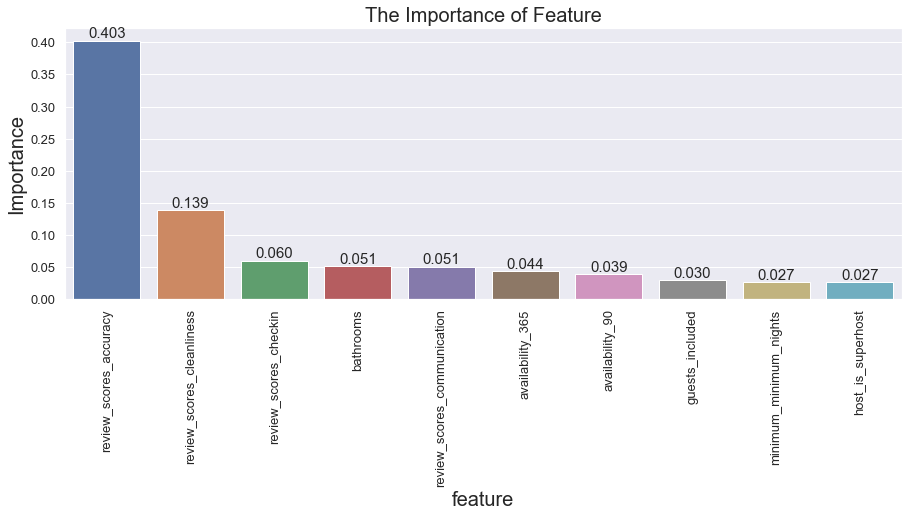

In [1539]:
sns.set(rc={'figure.figsize':(15,5)})
axis = sns.barplot(x= 'feature' , y='importance' , data = rf_result_top10)
axis.set_title("The Importance of Feature",fontsize= 20)
axis.set_ylabel('Importance',fontsize=20)
axis.set_xlabel('feature',fontsize=20)
plt.xticks(rotation='vertical',fontsize =13);
plt.yticks(fontsize=13)

for p in axis.patches:
    height = p.get_height()
    axis.annotate('{:.3F}'.format(height),xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom',fontsize=15);

## Insights
* In the barplot we can see the most of category score are important when evaluating the review scores rating, which is intutive. If customer are more  satistified with every aspect of house, they are more prone to give out higher review scores rating. To dive deeper, we can see that review socre accuracy is most important feature among all other features with feature importance of 0.403. Review scores accuracy represent how accurately listing page represent the space. We can infer that guest are more likely to have high expectance what they will see. Seeing from different aspect, we can make a assumption that what host write in description and how they write it will have influence on review socres rating since guest always get information from description and listing of ametities.